In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import numpy as np
import seaborn as sns

In [60]:
warnings.filterwarnings('ignore')

In [61]:
df= pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv',sep='\t')
#df.head()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uniq Id                          5000 non-null   object 
 1   Crawl Timestamp                  5000 non-null   object 
 2   Dataset Origin                   0 non-null      float64
 3   Product Id                       5000 non-null   object 
 4   Product Barcode                  0 non-null      float64
 5   Product Company Type Source      5000 non-null   object 
 6   Product Brand Source             139 non-null    object 
 7   Product Brand Normalised Source  139 non-null    object 
 8   Product Name Source              139 non-null    object 
 9   Match Rank                       0 non-null      float64
 10  Match Score                      0 non-null      float64
 11  Match Type                       0 non-null      float64
 12  Retailer            

In [63]:
## removing columns of null values

df.drop(['Dataset Origin','Product Barcode','Match Rank','Match Score','Match Type','Sku','Upc','Product Model Number','Product Contents','Bsr'],axis=1,inplace=True)

In [64]:
df.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Product Id                            0
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0
Product Tags                          0
Product Rating                     2806
Product Reviews Count              1654
Joining Key                           0
dtype: int64

In [65]:
## removing unnecessary columns from 

df.drop(['Product Available Inventory','Product Currency','Market','Product Name Source','Product Company Type Source','Product Brand Source','Product Brand Normalised Source','Crawl Timestamp','Product Url','Retailer','Joining Key'],axis=1,inplace=True)

In [66]:
df.isnull().mean()*100
#df['Product Rating'].value_counts()

Uniq Id                   0.00
Product Id                0.00
Product Category          0.20
Product Brand             0.26
Product Name              0.00
Product Price             0.84
Product Description      22.54
Product Image Url         0.00
Product Tags              0.00
Product Rating           56.12
Product Reviews Count    33.08
dtype: float64

In [67]:
## FILLING MISSING VALUES

df['Product Price'].fillna(df['Product Price'].mean(),inplace=True)
df['Product Category'].fillna('missing',inplace=True)
df['Product Brand'].fillna('missing',inplace=True)
df['Product Description'].fillna('missing',inplace=True)
df['Product Rating'].fillna(0.0,inplace=True)
df['Product Reviews Count'].fillna(0.0,inplace=True)

In [68]:
df['Uniq Id'] = df['Uniq Id'].str.extract(r'(\d+)').astype(float)
df['Product Id'] = df['Product Id'].str.extract(r'(\d+)').astype(float)

In [69]:
df['Product Rating'] = df['Product Rating'].round(2)

In [70]:
df['Product Rating'].unique()

array([0. , 4.5, 4.6, 4.3, 5. , 3.8, 4.1, 4.2, 3.7, 4.4, 4.8, 4. , 4.7,
       4.9, 2. , 3.9, 3. , 3.4, 3.1, 2.8, 3.2, 3.5, 2.6, 3.3, 2.7, 1. ,
       3.6, 2.3, 2.1, 2.5, 2.9, 1.3, 2.2, 1.5, 1.8, 2.4])

In [71]:
df['Product Reviews Count']=df['Product Reviews Count'].astype('int')
df.isnull().sum()
#df.info()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Price            0
Product Description      0
Product Image Url        0
Product Tags             0
Product Rating           0
Product Reviews Count    0
dtype: int64

there is 5000 rows and 11 columns 

In [72]:
print(f'the dataset have {df['Uniq Id'].nunique()} unique users') 
print(f'the dataset have {df['Product Id'].nunique()} unique products') 
print(f'the dataset have {df['Product Rating'].nunique()} unique ratings: {sorted(df['Product Rating'].unique())}') 


the dataset have 1721 unique users
the dataset have 1697 unique products
the dataset have 36 unique ratings: [0.0, 1.0, 1.3, 1.5, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


Text(0.5, 1.0, 'Distribution of product price')

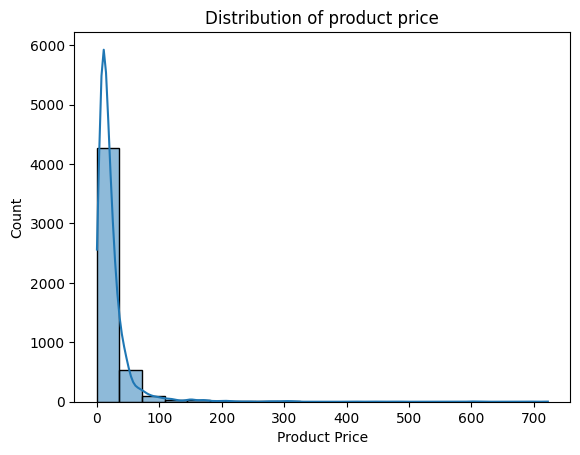

In [73]:
## Distribution of product price

sns.histplot(df['Product Price'],bins=20,kde=True)
plt.title('Distribution of product price')

Text(0.5, 1.0, 'Top 10 product categories')

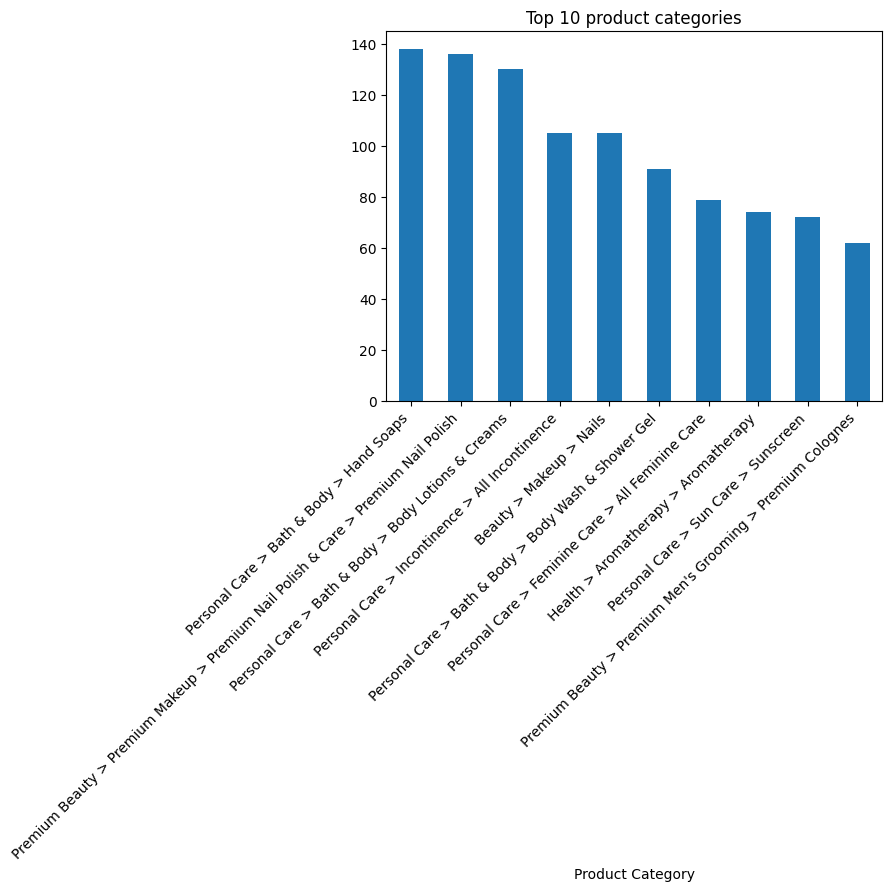

In [74]:
## Top 10 product categories

category_count = df['Product Category'].value_counts().head(10)
category_count.plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.title('Top 10 product categories')

Text(0.5, 1.0, 'price vs rating')

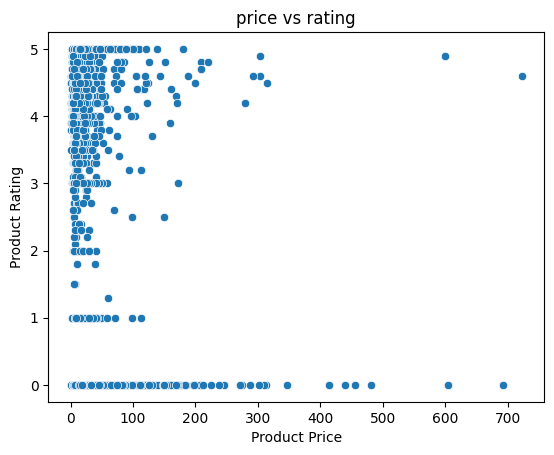

In [75]:
##price vs rating
sns.scatterplot(x=df['Product Price'],y=df['Product Rating'] )
plt.title('price vs rating')

Text(0.5, 1.0, 'Distribution of product ratings')

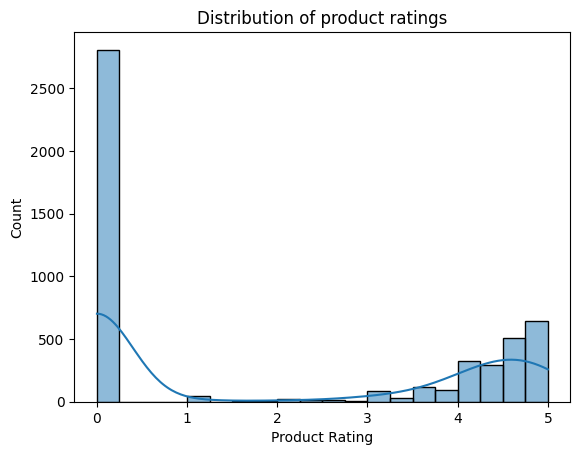

In [76]:
##Distribution of product ratings  
sns.histplot(df['Product Rating'],bins=20,kde=True)
plt.title('Distribution of product ratings')

Text(0.5, 1.0, 'price distribution by top 5 brands')

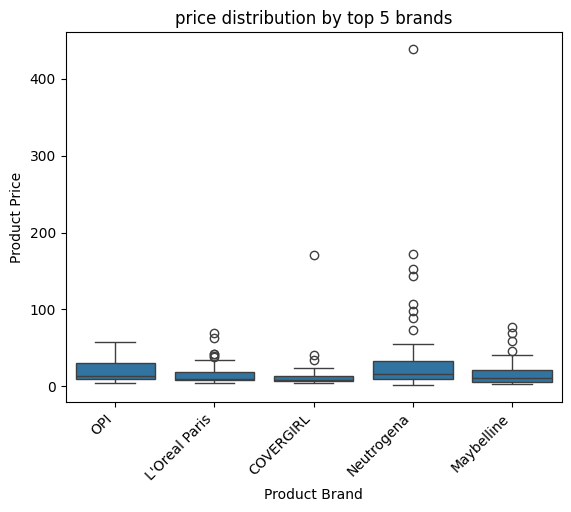

In [77]:
##price distribution by top 5 brands

top_5_brands = df['Product Brand'].value_counts().head().index
top_brands = df[df['Product Brand'].isin(top_5_brands)]
sns.boxplot(x='Product Brand', y='Product Price', data=top_brands)
plt.xticks(rotation=45,ha='right')
plt.title('price distribution by top 5 brands')

In [78]:
df.to_csv('small_project.csv')

# RATING BASED RECOMMANDATION SYSTEM

In [79]:
rating_reco = df.groupby(['Product Name','Product Image Url','Product Brand','Product Reviews Count'])['Product Rating'].mean().reset_index()

In [80]:
rating_reco=rating_reco.sort_values(by=['Product Rating','Product Reviews Count'],ascending=False,axis=0)

In [81]:
#rating_reco.head(10)

## CONTENT BASED RECOMMANDATION SYSTEM¶

In [82]:
def contentbasedrecommandation(df, item_name, top_n=10):
    if item_name not in df['Product Name'].values:
        print(f'the product {item_name} not present')
        return pd.DataFrame()

    vectorizer = TfidfVectorizer(stop_words='english')

    tfidf = vectorizer.fit_transform(df['Product Tags'])
    cos = cosine_similarity(tfidf,tfidf)

    item=df[df['Product Name']==item_name].index[0]

    enm_list = list(enumerate(cos[item]))

    sort_list=sorted(enm_list, key=lambda x: x[1], reverse= True)

    first_indices=sort_list[1:top_n+1]
    index_indices=[x[0] for x in first_indices]

    top_product= df.iloc[index_indices][['Uniq Id','Product Id','Product Name','Product Rating','Product Image Url']]
    return top_product

In [83]:
item_name= 'Nice n Easy Permanent Color, 111 Natural Medium Auburn 1 ea (Pack of 3)'
recommanded_product= contentbasedrecommandation(df, item_name, top_n=8).reset_index()
#recommanded_product

## COLLABORATIVE FILTERING BASED RECOMMENDATION SYSTEM

In [84]:
def recommended_products(df,target_user,top_n=10):
    if target_user not in df['Uniq Id']:
        print(f'the user id {target_user} is invalid')
        return pd.DataFrame()
        
    user_item_matrix = df.pivot_table(index='Uniq Id',columns='Product Id',values='Product Rating',aggfunc='mean').fillna(0).astype(int)

    similarity = cosine_similarity(user_item_matrix)
    similarity = np.delete(similarity,target_user,axis=0)

    user_similarities = similarity[target_user]

    similar_user_indices = user_similarities.argsort()[::-1]

    recommend_items = []
    for user_index in similar_user_indices:
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user!=0) & (user_item_matrix.iloc[target_user]==0)
        recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

    recommended_products = df[df['Product Id'].isin(recommend_items)][['Uniq Id','Product Id','Product Name','Product Rating','Product Image Url']]

    return recommended_products.head(top_n)


In [85]:
target_user = 4
recommanded_items = recommended_products(df, target_user, top_n=8).reset_index()
#recommanded_items

##  HYBRID RECOMMENDATION SYSTEM

In [89]:
def hybrid_recommandation(df,target_user,item_name,top_n=10):
    half_n = top_n//2
    recommanded_items = recommended_products(df, target_user, half_n).reset_index()
    recommanded_product = contentbasedrecommandation(df, item_name, top_n-half_n).reset_index()
    top_products = pd.concat([recommanded_items,recommanded_product]).drop_duplicates()
    return top_products

In [97]:
item_name = 'Gillette TRAC II Plus Razor Blade Refills, Fit TRAC II Handles, 10 ct'
target_user = 4
top_products = hybrid_recommandation(df,target_user,item_name,top_n=8)
top_products.reset_index()

,level_0,index,Uniq Id,Product Id,Product Name,Product Rating,Product Image Url
0,0,1,9.500000e+01,7.600000e+01,"Nice n Easy Permanent Color, 111 Natural Mediu...",0.0,https://i5.walmartimages.com/asr/9c8e42e4-13a5...
1,1,5,2.620000e+02,7.569141e+09,Old Spice Artisan Styling High Hold Matte Fini...,4.6,https://i5.walmartimages.com/asr/73214b95-72ce...
2,2,6,5.224642e+09,3.710000e+02,"Colgate My First Baby and Toddler Toothpaste, ...",4.3,https://i5.walmartimages.com/asr/d28b16f4-1bd4...
3,3,9,3.200000e+01,1.030521e+42,(3 pack) Vaseline Lip Therapy Tinted Lip Balm ...,0.0,https://i5.walmartimages.com/asr/6fced36e-5459...
4,0,752,6.000000e+00,9.000000e+00,Gillette Trac II Plus Refill Razor Blade Cartr...,0.0,https://i5.walmartimages.com/asr/d19864e6-f6ac...
5,1,4824,5.000000e+00,7.000000e+00,Gillette Venus Extra Smooth Swirl Womens Razor...,4.4,https://i5.walmartimages.com/asr/1ad8d189-8b0e...
6,2,3188,3.000000e+00,5.400000e+01,Gillette Venus Extra Smooth Sensitive Womens R...,0.0,https://i5.walmartimages.com/asr/581c9f3a-2b2c...
7,3,1711,0.000000e+00,6.958062e+15,Gillette Venus Womens Refill Razor Blade Cartr...,0.0,https://i5.walmartimages.com/asr/c09656e8-a76b...
